In [1]:
# sample_rate = 44100
# import numpy as np
# from scipy.io import wavfile
# from scipy import signal

# def downsample_audio(input_file, output_file):
#     # Load the input WAV file
#     sample_rate, audio = wavfile.read(input_file)

#     # Calculate the desired number of samples for the 10 Hz sample rate
#     num_samples_10 = int(len(audio) * 10 / sample_rate)

#     # Downsample the audio to 10 Hz using scipy.signal.resample
#     audio_10 = signal.resample(audio, num_samples_10)

#     # Set the sample rate to 10 Hz
#     sample_rate_10 = 10

#     # Save the downsampled audio to the output file
#     wavfile.write(output_file, sample_rate_10, audio_10)

# # Example usage
# input_file_path = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\1_marissa.wav'
# output_file_path = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\1_marissa10hz.wav'
# downsample_audio(input_file_path, output_file_path)

In [2]:
from pydub import AudioSegment
import numpy as np
import soundfile as sfile
import math
import matplotlib.pyplot as plt
def convert_to_decibel(arr):
    ref = 1
    if arr!=0:
        return 20 * np.log10(abs(arr) / ref)
        
    else:
        return -60

def DB_extractor(filename):
    audio=AudioSegment.from_mp3(filename)
    signal, sr = sfile.read(filename)
    samples=audio.get_array_of_samples()
    samples_sf=0
    try:
        samples_sf = signal[:, 0]  # use the first channel for dual
    except:
        samples_sf=signal  # for mono
    data=[convert_to_decibel(i) for i in samples_sf]
    percentile=np.percentile(data,[25,50,75])
    print(f"1st Quartile : {percentile[0]}")
    print(f"2nd Quartile : {percentile[1]}")
    print(f"3rd Quartile : {percentile[2]}")
    print(f"Mean : {np.mean(data)}")
    print(f"Median : {np.median(data)}")
    print(f"Standard Deviation : {np.std(data)}")
    print(f"Variance : {np.var(data)}")


    plt.figure()
    plt.subplot(3, 1, 1)
    plt.plot(samples)
    plt.xlabel('Samples')
    plt.ylabel('Data: AudioSegment')

    plt.subplot(3, 1, 2)
    plt.plot(samples_sf)
    plt.xlabel('Samples')
    plt.ylabel('Data: Soundfile')
    plt.subplot(3, 1, 3)
    minnimum = min(data)
    values = [(x-minnimum) for x in data]
    plt.plot(values)
    plt.xlabel('Samples')
    plt.ylabel('dB Full Scale (dB)')
    plt.tight_layout()
    plt.show()
    return values


c:\Users\omari\.conda\envs\deeplearning\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


1st Quartile : -57.43994516947061
2nd Quartile : -47.89752007507736
3rd Quartile : -37.47951648911237
Mean : -48.346460804799676
Median : -47.89752007507736
Standard Deviation : 13.358390020368995
Variance : 178.44658393629396


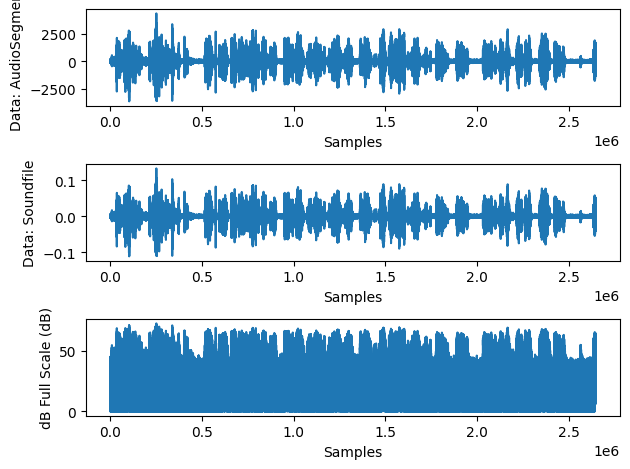

1st Quartile : -58.71332676685816
2nd Quartile : -49.56046874038188
3rd Quartile : -39.628476578071655
Mean : -49.94562217264503
Median : -49.56046874038188
Standard Deviation : 13.103673912533777
Variance : 171.7062700060183


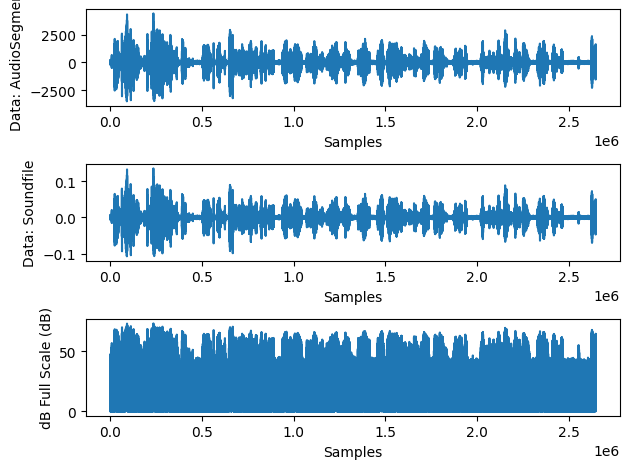

In [3]:
MarissaPath = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\222_marissa.wav'
SubjectPath = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\222_subject.wav'
values_marissa = DB_extractor(MarissaPath)
values_subject = DB_extractor(SubjectPath)

In [4]:
def calculateAverage(values,n):
    # Calculate the average of each group of n elements
    average_list = [sum(values[i:i+n]) / n for i in range(0, len(values), n)]
    return average_list

In [5]:
import pandas as pd
data = pd.read_csv(r"R:\REASEARCHASSISTANT\openFace files\222\222_emotions_subject.csv")
#361 - x_62 | #365 - x_66 | #429 - y_62 | #433 - y_66 | #62 - (361,429) | #66 - (365,433) | data.iloc[index1,index2]
sum1 = 0
min = 1000
max = 0
counter = 0
distances = []
for i in range(1800):
    distance = ((data.iloc[i,350] - data.iloc[i,354])**2 + (data.iloc[i,418] - data.iloc[i,422])**2)**0.5
    distances.append(distance)
    sum1 += distance
    if(distance < min):
        min = distance
    if(distance > max):
        max = distance
    if(distance > 6):
        counter +=1
avg = sum1/data.shape[0]

In [25]:
window_lenth = 1470 #1 video frame size = 1470 audio samples  for sample rate of 44100
sample_rate = 44100
threshold = 30
marissa_average_list = calculateAverage(values_marissa,window_lenth)
subject_average_list = calculateAverage(values_subject,window_lenth)
talking = []
talking_marissa = []
talking_subject = []
time_stamp = window_lenth/sample_rate
print("LENGTH of average list = ", len(marissa_average_list))
counter = 0
for i in range(len(marissa_average_list)):
    start = (i*time_stamp)
    end = ((i*time_stamp)+time_stamp)
    average_marissa = marissa_average_list[i]
    average_subject = subject_average_list[i]
    if((average_marissa > threshold) and (average_subject > threshold)): 
        talking.append((start, (end)))
        if(distances[i] > 18.6 and data.iloc[i,3] >=0.98):
            talking_subject.append((start, (end)))
            counter +=1
        else:
            talking_marissa.append((start, (end)))
        # if(average_subject > (average_marissa+6)):
        #     talking_marissa.append((start, (end)))
        # else:
            # talking_subject.append((start, (end)))
        # else:
            # talking_subject.append((start*time_stamp, (end)*time_stamp))
            # talking_marissa.append((start*time_stamp, (end)*time_stamp))
print(talking)
print(counter)

LENGTH of average list =  1800
[(0.13333333333333333, 0.16666666666666666), (0.16666666666666666, 0.19999999999999998), (0.2, 0.23333333333333334), (0.23333333333333334, 0.26666666666666666), (0.26666666666666666, 0.3), (0.3333333333333333, 0.36666666666666664), (0.36666666666666664, 0.39999999999999997), (0.4666666666666667, 0.5), (0.5, 0.5333333333333333), (0.5333333333333333, 0.5666666666666667), (0.5666666666666667, 0.6), (0.6, 0.6333333333333333), (0.6333333333333333, 0.6666666666666666), (0.6666666666666666, 0.7), (0.7, 0.7333333333333333), (0.7333333333333333, 0.7666666666666666), (0.7666666666666666, 0.7999999999999999), (0.8, 0.8333333333333334), (0.8333333333333334, 0.8666666666666667), (0.8666666666666667, 0.9), (0.9, 0.9333333333333333), (0.9333333333333333, 0.9666666666666667), (0.9666666666666667, 1.0), (1.0, 1.0333333333333334), (1.0333333333333332, 1.0666666666666667), (1.0666666666666667, 1.1), (1.1, 1.1333333333333335), (1.1333333333333333, 1.1666666666666667), (1.166

In [26]:
from pydub import AudioSegment

def extract_intervals(input_file, output_file, intervals):
    audio = AudioSegment.from_file(input_file)

    # Convert intervals from seconds to milliseconds
    intervals_ms = [(start * 1000, end * 1000) for start, end in intervals]

    # Extract the specified intervals from the audio
    extracted_audio = sum([audio[start:end] for start, end in intervals_ms], AudioSegment.silent())

    # Export the extracted audio to the output file
    extracted_audio.export(output_file, format="wav")

output_file1 = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\results\10\BothTalking.wav'
output_file2 = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\results\10\MarissaTalking.wav'
output_file3 = r'R:\REASEARCHASSISTANT\RECORDS\newfiles\results\10\SubjectTalking.wav'
# talking.pop() 
# talking_marissa.pop() 
# talking_subject.pop() 
extract_intervals(MarissaPath, output_file1, talking)
extract_intervals(MarissaPath, output_file2, talking_marissa)
extract_intervals(SubjectPath, output_file3, talking_subject)

In [8]:
import os
import numpy as np
from scipy.io import wavfile
def extract_channels(file_path):
    # Load the stereo WAV file
    sample_rate, data = wavfile.read(file_path)

    # Check if the audio is stereo
    if len(data.shape) != 2:
        raise ValueError("Input audio is not stereo")

    # Extract the left and right channels
    left_channel = data[:, 0]
    right_channel = data[:, 1]

    # Create output file paths for left and right channels
    output_dir = os.path.dirname(file_path)
    left_channel_path = os.path.join(output_dir, "left_channel.wav")
    right_channel_path = os.path.join(output_dir, "right_channel.wav")

    # Save the left and right channels as separate audio files
    wavfile.write(left_channel_path, sample_rate, left_channel)
    wavfile.write(right_channel_path, sample_rate, right_channel)

    # Print the output file paths
    print("Left channel saved as:", left_channel_path)
    print("Right channel saved as:", right_channel_path)
    
extract_channels(r'R:\REASEARCHASSISTANT\RECORDS\newfiles\1_both.wav')

Left channel saved as: R:\REASEARCHASSISTANT\RECORDS\newfiles\left_channel.wav
Right channel saved as: R:\REASEARCHASSISTANT\RECORDS\newfiles\right_channel.wav
